Inteligência Artificial e Aprendizado de Máquina - 2025/01

- Gabriel Assmann Schafer
- Gabriel Heyde Pintos
- Isabela Lima da Cunha

#1. Modelagem

##1.1. Dataset



*   O grupo escolheu o dataset [Simple vs Comminuted Fractures X-ray Data](https://www.kaggle.com/datasets/orvile/simple-vs-comminuted-fractures-x-ray-data) do Kaggle publicado em dezembro de 2024. Ele é dividido em categorias de fraturas, ou seja, simples ou cominutiva. Além disso, no dataset há imagens aumentadas para cada tipo de fratura, facilitando o entendimento para as redes. O dataset consiste em:

    1. Fratura Simples:
        - Imagens Originais: 1,211.
        - Imagens aumentadas: 6,311.
        - Total de Imagens: 7,522.

    2. Fratura Cominutiva:
        - Imagens Originais: 1,173.
        - Imagens aumentadas: 7,366.
        - Total de Imagens: 8,539.


<br>

*   Ao total são **16,061** imagens no formato JPG, contando com as originais e as aumentadas.

<br>

## 1.2.  Técnicas de Aumento

*   Nesse dataset foram utilizadas técnicas de aumento em parte das imagens, elas são aplicadas por alguns motivos. Muitas vezes o modelo acaba apenas decorando as respostas ao invés de realmente aprender. Então, ao aumentar dataset com imagens com ruído ajuda o modelo a aprender padrões mais gerais, o que reduz bastante o **overfitting**.
<br>

* Técnicas utilizadas:

    - **Zoom**
    - **Rotação da Imagem**: de mais ou menos 30 graus
    - **Ajuste de Brilho e Contraste**
    - **Espelhamento Horizontal e Vertical**

<br>











#1.3. Pré-processamento dos Dados

## 1.3.1. Baixar o dataset



*   Vamos baixar o dataset por meio da Api Key do Kaggle



In [ ]:
! pip install kaggle


In [ ]:
import os
import shutil

# Caminho para o arquivo kaggle.json
kaggle_json_path = '/kaggle/kaggle.json'

# Crie o diretório .kaggle se não existir
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Move o arquivo kaggle.json para o diretório .kaggle
shutil.move(kaggle_json_path, os.path.expanduser('~/.kaggle/kaggle.json'))

# Ajusta as permissões do arquivo
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download orvile/simple-vs-comminuted-fractures-x-ray-data


Dataset URL: https://www.kaggle.com/datasets/orvile/simple-vs-comminuted-fractures-x-ray-data
License(s): Attribution 4.0 International (CC BY 4.0)
 12% 236M/1.96G [00:00<00:02, 779MB/s] 

In [3]:
#Unzip the dataset file
! unzip /content/simple-vs-comminuted-fractures-x-ray-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented/Simple Bone Fracture/555_Simple Bone Fracture_original.jpg  
  inflating: Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented/Simple Bone Fracture/555_Simple Bone Fracture_rotate.jpg  
  inflating: Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented/Simple Bone Fracture/555_Simple Bone Fracture_zoom.jpg  
  inflating: Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented/Simple Bone Fracture/556_Simple Bone Fracture_brightness_contrast.jpg  
  inflating: Bon



*   Aqui, podemos observar que o dataset contém duas classes principais: Original e Augmented. Cada uma dessas classes está subdividida em duas categorias adicionais: Fratura Simples e Fratura Cominutiva.


In [4]:
import os

# Caminho da pasta onde estão as imagens (pode ajustar conforme o nome do zip que baixou)
base_dir = "/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture"

# Verifica as subpastas (classes)
classes = os.listdir(base_dir)
print("Classes encontradas:", classes)

Classes encontradas: ['Augmented', 'Original', '.ipynb_checkpoints']


##1.3.2. Exemplos de imagens do dataset



*   Abaixo há quatro exemplos de imagens disponíveis no dataset



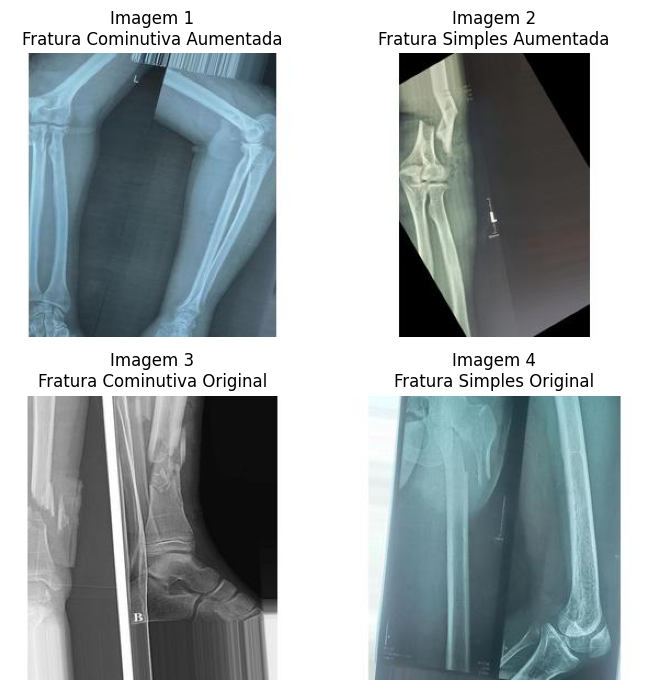

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Image paths
img_original_com = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Original_resized/Comminuted Bone Fracture/331_Comminuted Bone Fracture.jpg'
img_original_sim = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Original_resized/Simple Bone Fracture/197_Simple Bone Fracture.jpg'
img_augmented_com = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Comminuted Bone Fracture/1016_Comminuted Bone Fracture_zoom.jpg'
img_augmented_sim = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Simple Bone Fracture/1066_Simple Bone Fracture_rotate.jpg'

# Open images
img_1 = Image.open(img_augmented_com)
img_2 = Image.open(img_augmented_sim)
img_3 = Image.open(img_original_com)
img_4 = Image.open(img_original_sim)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Display images
axs[0, 0].imshow(img_1)
axs[0, 0].set_title('Imagem 1\nFratura Cominutiva Aumentada')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_2)
axs[0, 1].set_title('Imagem 2\nFratura Simples Aumentada')
axs[0, 1].axis('off')

axs[1, 0].imshow(img_3)
axs[1, 0].set_title('Imagem 3\nFratura Cominutiva Original')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_4)
axs[1, 1].set_title('Imagem 4\nFratura Simples Original')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 1.3.3. Verificar tamanho das imagens



*  Nesta seção, apresentamos os tamanhos mais comuns das imagens no dataset. Na próxima seção, vamos redimensionar todas as imagens para garantir uniformidade no tamanho.

In [5]:
from PIL import Image
import os
from collections import Counter


# Caminhos para as imagens originais e aumentadas
folder_path_original = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Original'
folder_path_augmented = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented'

sizes_original = []
sizes_augmented = []

# Função para ler os tamanhos das imagens
def coletar_tamanhos(folder_path, lista_destino):
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                try:
                    with Image.open(file_path) as img:
                        lista_destino.append(img.size)
                except:
                    print(f"Erro ao abrir: {file_path}")

# Coleta os tamanhos
coletar_tamanhos(folder_path_original, sizes_original)
coletar_tamanhos(folder_path_augmented, sizes_augmented)

# Contadores
counter_original = Counter(sizes_original)
counter_augmented = Counter(sizes_augmented)

# Exibe os tamanhos mais comuns
print("Tamanhos mais comuns (LxA) nas imagens originais:")
for size, count in counter_original.most_common():
    print(f"{size}: {count} imagens")

print("\nTamanhos mais comuns (LxA) nas imagens aumentadas:")
for size, count in counter_augmented.most_common():
    print(f"{size}: {count} imagens")



Tamanhos mais comuns (LxA) nas imagens originais:
(1280, 960): 40 imagens
(576, 722): 17 imagens
(331, 1280): 15 imagens
(960, 1280): 15 imagens
(755, 441): 15 imagens
(286, 409): 14 imagens
(369, 442): 14 imagens
(938, 1109): 14 imagens
(747, 576): 14 imagens
(2299, 2701): 13 imagens
(444, 630): 13 imagens
(553, 661): 13 imagens
(1115, 1328): 12 imagens
(852, 714): 12 imagens
(786, 667): 12 imagens
(929, 1267): 12 imagens
(1053, 1200): 12 imagens
(721, 510): 12 imagens
(559, 689): 12 imagens
(1084, 906): 12 imagens
(705, 685): 12 imagens
(1223, 958): 12 imagens
(1216, 960): 12 imagens
(533, 649): 12 imagens
(2722, 2975): 11 imagens
(901, 1052): 11 imagens
(850, 609): 11 imagens
(823, 560): 11 imagens
(628, 501): 11 imagens
(613, 967): 11 imagens
(784, 544): 11 imagens
(871, 1003): 11 imagens
(2366, 2806): 11 imagens
(840, 1018): 11 imagens
(576, 860): 11 imagens
(2699, 3274): 11 imagens
(600, 437): 11 imagens
(1070, 1280): 11 imagens
(959, 1129): 11 imagens
(925, 964): 11 imagens
(971

## 1.3.4. Redimensionamento das imagens

*  As imagens foram redimensionadas para o tamanho padrão de **260x260 pixels**, que é o esperado pela arquitetura **EfficientNetB2**. Essa etapa é importante, pois futuramente será aplicado **transfer learning** com essa rede, e manter o tamanho compatível ajuda a garantir melhores resultados.


*   A proporção de cada imagem foi preservada durante o redimensionamento, utilizando um fundo branco para evitar distorções. Isso é especialmente relevante para o nosso conjunto de dados, pois, se uma fratura for distorcida, o modelo pode confundir uma fratura simples com uma fratura cominutiva.


In [6]:
from PIL import Image
import os

def resize_with_padding(input_root, output_root, new_size=(260, 260), padding_color=(255, 255, 255)):
    os.makedirs(output_root, exist_ok=True)

    for root, dirs, files in os.walk(input_root):
        relative_path = os.path.relpath(root, input_root)
        output_path = os.path.join(output_root, relative_path)
        os.makedirs(output_path, exist_ok=True)

        for filename in files:
            if filename.lower().endswith('.jpg'):
                input_img_path = os.path.join(root, filename)
                output_img_path = os.path.join(output_path, filename)

                try:
                    with Image.open(input_img_path) as img:
                        img = img.convert("RGB")
                        img.thumbnail(new_size, Image.LANCZOS)  # Redimensiona mantendo proporção

                        # Cria fundo branco e centraliza a imagem nele
                        background = Image.new("RGB", new_size, padding_color)
                        offset = (
                            (new_size[0] - img.size[0]) // 2,
                            (new_size[1] - img.size[1]) // 2
                        )
                        background.paste(img, offset)
                        background.save(output_img_path)

                    print(f"Salvo: {output_img_path}")

                except Exception as e:
                    print(f'Erro em {input_img_path}: {e}')


resize_with_padding(folder_path_original, folder_path_original + '_resized')
resize_with_padding(folder_path_augmented, folder_path_augmented + '_resized')



Streaming output truncated to the last 5000 lines.
Salvo: /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Simple Bone Fracture/817_Simple Bone Fracture_zoom.jpg
Salvo: /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Simple Bone Fracture/1431_Simple Bone Fracture_zoom.jpg
Salvo: /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Simple Bone Fracture/495_Simple Bone Fracture_flip_horizontal.jpg
Salvo: /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Simple Bone Fracture/1042_Simple Bone Fractu



* Abaixo, segue uma demonstração de como as imagens ficaram após o redimensionamento. Para fins ilustrativos, foram adicionadas bordas pretas às imagens, a fim de facilitar a visualização do fundo branco inserido para preservar a proporção original.



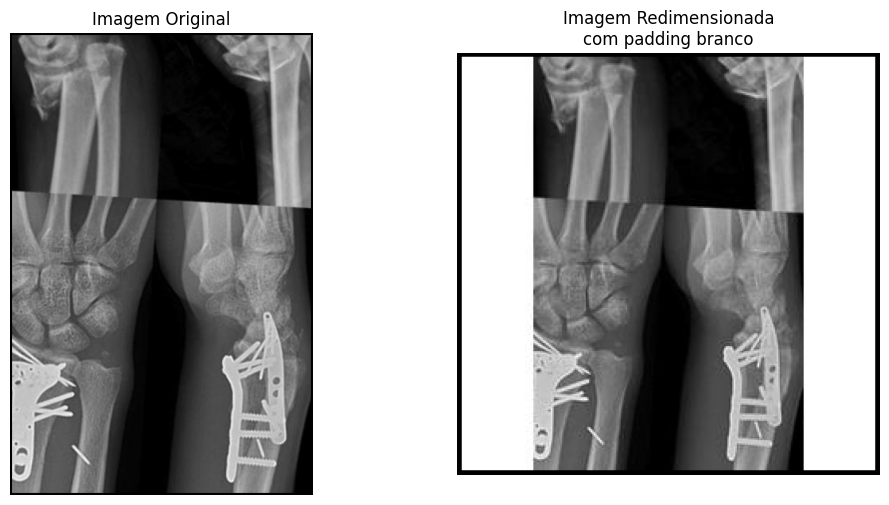

In [8]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

def show_with_border(img, border_size=3, border_color='black'):
    img_with_border = ImageOps.expand(img, border=border_size, fill=border_color)
    return img_with_border


img_original_path = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented/Comminuted Bone Fracture/1013_Comminuted Bone Fracture_zoom.jpg'
img_resized_path = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Comminuted Bone Fracture/1013_Comminuted Bone Fracture_zoom.jpg'  # mesma imagem mas na pasta _resized


img_original = Image.open(img_original_path)
img_resized = Image.open(img_resized_path)

# Coloca borda preta nas duas imagens
img_original_bordered = show_with_border(img_original)
img_resized_bordered = show_with_border(img_resized)

# Mostrar imagens
fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].imshow(img_original_bordered)
axs[0].set_title('Imagem Original')
axs[0].axis('off')

axs[1].imshow(img_resized_bordered)
axs[1].set_title('Imagem Redimensionada\ncom padding branco')
axs[1].axis('off')

plt.show()

# 1.4. Separação do dataset


* O dataset será dividido nas seguintes proporções:
  - **Treinamento:** 70%
  - **Validação:** 20%
  - **Teste:** 10%

* A divisão será feita de forma proporcional entre imagens originais e aumentadas, mantendo o equilíbrio das classes e suas variações.

* O conjunto de **validação** será utilizado para acompanhar o desempenho do modelo durante o treinamento e auxiliar na escolha dos hiperparâmetros. Já o conjunto de **teste**  será reservado para a avaliação final do modelo.
* Os conjuntos também serão agrupados por famílias de imagens. Cada família consiste em uma imagem original (de fratura simples ou cominutiva) e suas respectivas versões aumentadas. Essa organização é essencial para evitar overfitting, pois o modelo pode acabar "decorando" as imagens se, por exemplo, encontrar uma versão aumentada no treinamento e a original no teste.




##1.4.1. Exemplo:
* Há a possibilidade de ter duas famílias no dataset com a ID igual a 1000, porém uma é de Fratura Simples e a outra de Fratura Cominutiva. Abaixo, há uma demonstração de que duas imagens diferentes podem compartilhar o mesmo número de identificação. Por isso, na hora da divisão, serão considerados tanto o número de identificação quanto a classe da imagem, garantindo que as famílias corretas permaneçam agrupadas.

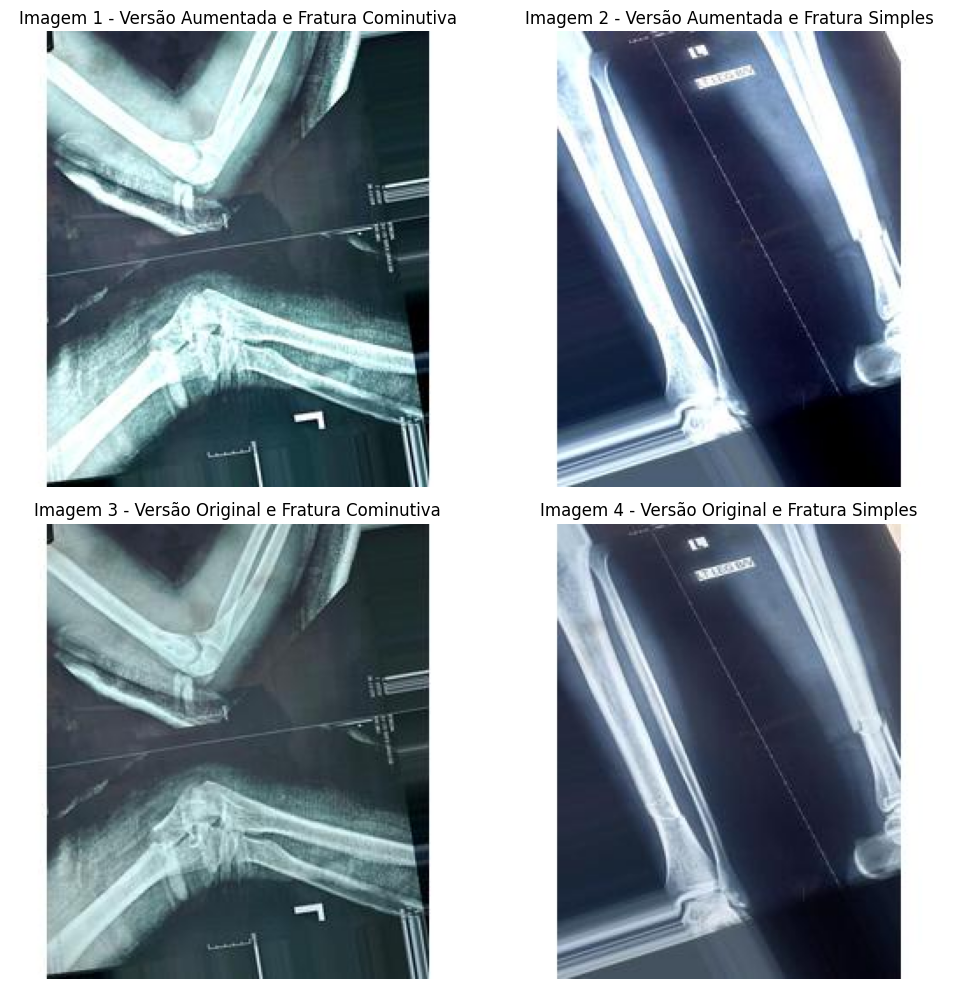

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Image paths
img_augmented_com_1000 = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Comminuted Bone Fracture/1000_Comminuted Bone Fracture_brightness_contrast.jpg'
img_augmented_sim_1000 = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Simple Bone Fracture/1000_Simple Bone Fracture_brightness_contrast.jpg'
img_original_com_1000 = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Original_resized/Comminuted Bone Fracture/1000_Comminuted Bone Fracture.jpg'
img_original_sim_1000 = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Original_resized/Simple Bone Fracture/1000_Simple Bone Fracture.jpg'

# Open images
img_1 = Image.open(img_augmented_com_1000)
img_2 = Image.open(img_augmented_sim_1000)
img_3 = Image.open(img_original_com_1000)
img_4 = Image.open(img_original_sim_1000)


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display images
axs[0, 0].imshow(img_1)
axs[0, 0].set_title('Imagem 1 - Versão Aumentada e Fratura Cominutiva')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_2)
axs[0, 1].set_title('Imagem 2 - Versão Aumentada e Fratura Simples')
axs[0, 1].axis('off')

axs[1, 0].imshow(img_3)
axs[1, 0].set_title('Imagem 3 - Versão Original e Fratura Cominutiva')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_4)
axs[1, 1].set_title('Imagem 4 - Versão Original e Fratura Simples')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

##1.4.2. Separação por famílias



*   Abaixo há o agrupamento das imagens por famílias, que depois serão separadas entre treino, validação e teste.



In [10]:
from collections import defaultdict
import os
import shutil


original_dir = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Original_resized'
augmented_dir = '/content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized'

# Dicionário pra agrupar as imagens por base
familias = defaultdict(list)

def normalizar_nome(nome):
    # Minúsculas e troca espaços por underline
    return nome.lower().replace(' ', '_')

# Agrupa as imagens originais (chave = numero_classe normalizado)
for classe in os.listdir(original_dir):
    classe_path = os.path.join(original_dir, classe)
    classe_nome_norm = normalizar_nome(classe)
    for nome in os.listdir(classe_path):
        numero_imagem = nome.split('_')[0].lower()
        nome_base = f"{numero_imagem}_{classe_nome_norm}"
        familias[nome_base].append(os.path.join(classe_path, nome))

# Adiciona as imagens aumentadas
for classe in os.listdir(augmented_dir):
    classe_path = os.path.join(augmented_dir, classe)
    classe_nome_norm = normalizar_nome(classe)
    for nome in os.listdir(classe_path):
        numero_imagem = nome.split('_')[0].lower()
        nome_base = f"{numero_imagem}_{classe_nome_norm}"
        familias[nome_base].append(os.path.join(classe_path, nome))





*   Como mencionado anteriormente, as proporções são de 70% para treino, 20% para validação e 10% para teste. As famílias de imagens são separadas em cada conjunto de forma aleatória, respeitando essas proporções.



In [11]:
import random
random.seed(42)
chaves_familias = list(familias.keys())
random.shuffle(chaves_familias)

n_total = len(chaves_familias)
n_test = int(n_total * 0.10)
n_val = int(n_total * 0.20)
n_train = n_total - n_test - n_val

familias_test = set(chaves_familias[:n_test])
familias_val = set(chaves_familias[n_test:n_test+n_val])
familias_train = set(chaves_familias[n_test+n_val:])

assert familias_train.isdisjoint(familias_val)
assert familias_val.isdisjoint(familias_test)
assert familias_train.isdisjoint(familias_test)

def coletar_imagens(familias_selecionadas):
    imagens = []
    for fam in familias_selecionadas:
        imagens.extend(familias[fam])
    return imagens

X_train = coletar_imagens(familias_train)
X_val = coletar_imagens(familias_val)
X_test = coletar_imagens(familias_test)

def pegar_labels(imagens):
    labels = []
    for img_path in imagens:
        classe = os.path.basename(os.path.dirname(img_path)).lower()
        if 'comminuted' in classe:
            labels.append('Comminuted')
        elif 'simple' in classe:
            labels.append('Simple')
        else:
            labels.append('Desconhecida')
    return labels

y_train = pegar_labels(X_train)
y_val = pegar_labels(X_val)
y_test = pegar_labels(X_test)




*   Aqui temos exatamente o número de imagens em cada conjunto, dividido entre imagens originais e aumentadas, bem como entre fraturas simples e cominutivas.



In [12]:
from collections import Counter
import pandas as pd

def contar_classes(imagens):
    labels = pegar_labels(imagens)
    return Counter(labels)

def contar_origem(imagens):
    originais = sum('Original_resized' in path for path in imagens)
    aumentadas = sum('Augmented_resized' in path for path in imagens)
    return originais, aumentadas

def gerar_df_infos():
    dados = []

    for nome, imagens in [("Treino", X_train), ("Validação", X_val), ("Teste", X_test)]:
        contagem_classes = contar_classes(imagens)
        total = sum(contagem_classes.values())
        originais, aumentadas = contar_origem(imagens)

        dados.append({
            "Conjunto": nome,
            "Total": total,
            "Originais": originais,
            "Aumentadas": aumentadas,
            "Comminuted": contagem_classes.get("Comminuted", 0),
            "Simple": contagem_classes.get("Simple", 0),
            "Desconhecida": contagem_classes.get("Desconhecida", 0)
        })

    df = pd.DataFrame(dados)
    return df

# Cria e mostra o DataFrame
df_infos = gerar_df_infos()
df_infos


Conjunto  Total  Originais  Aumentadas  Comminuted  Simple  Desconhecida
0     Treino  11276       1678        9598        6100    5176             0
1  Validação   3140        427        2713        1563    1577             0
2      Teste   1645        279        1366         876     769             0



*   Abaixo criamos um novo diretório com o dataset organizado em três conjuntos: treino, validação e teste.



In [13]:
import os
import shutil

def criar_pastas_e_organizar(base_dir, imagens, labels):
    for split in imagens:
        for classe in ['simple', 'comminuted']:
            os.makedirs(os.path.join(base_dir, split, classe), exist_ok=True)
        for img_path, label in zip(imagens[split], labels[split]):
            classe_pasta = label.lower()
            dest_path = os.path.join(base_dir, split, classe_pasta, os.path.basename(img_path))
            shutil.copy(img_path, dest_path)

# Organiza os dados entre treino, validação e teste
imagens = {'train': X_train, 'val': X_val, 'test': X_test}
labels = {'train': y_train, 'val': y_val, 'test': y_test}

base_dir = '/content/BoneFractureOrganizado'
criar_pastas_e_organizar(base_dir, imagens, labels)




*  O gráfico abaixo mostra o balanceamento das classes em cada conjunto (treino, validação e teste).



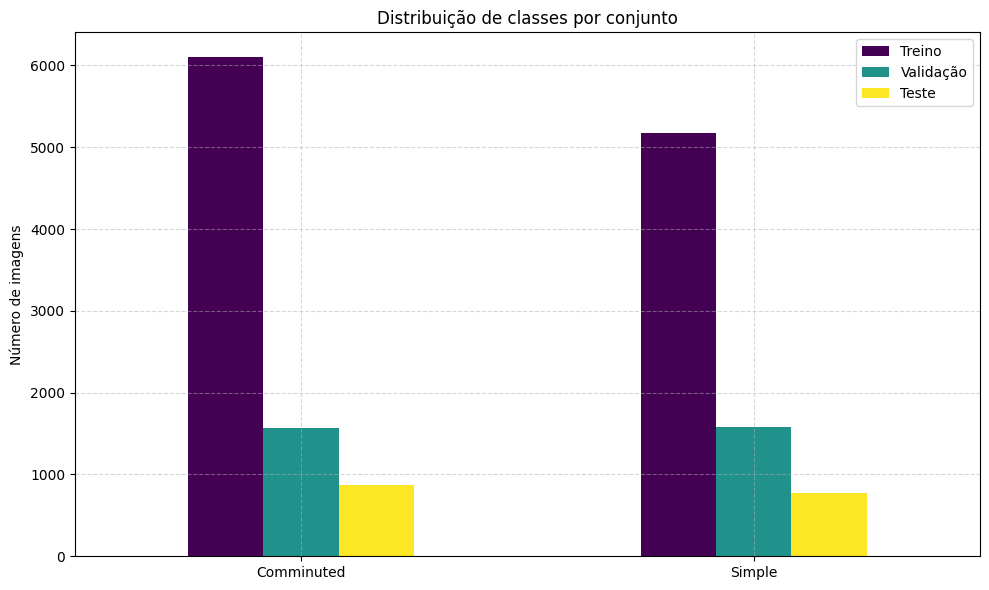

In [14]:
import matplotlib.pyplot as plt

# Conta as classes por split
contagem = {
    'Treino': contar_classes(X_train),
    'Validação': contar_classes(X_val),
    'Teste': contar_classes(X_test),
}

# Transforma em DataFrame
df = pd.DataFrame(contagem).fillna(0).astype(int)
df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Distribuição de classes por conjunto')
plt.ylabel('Número de imagens')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




*  Aqui temos uma demonstração de que as famílias de imagens estão sendo agrupadas corretamente. Neste caso, a familía com a ID 1015 de Fratura Cominutiva está no conjunto de treino.


In [15]:
def normalizar_chave_busca(nome_familia):
    return nome_familia.lower().replace(' ', '_')

def localizar_familia(nome_familia):
    nome_norm = normalizar_chave_busca(nome_familia)
    for fam in familias.keys():
        if fam == nome_norm:
            if fam in familias_train:
                split = 'train'
            elif fam in familias_val:
                split = 'val'
            elif fam in familias_test:
                split = 'test'
            else:
                split = 'desconhecido'
            print(f"Família identificada: {fam}")
            print(f"Essa família está no conjunto: {split}")
            print(f"Imagens dessa família:")
            for img in familias[fam]:
                print(f" - {img}")
            return
    print("Família não encontrada.")
localizar_familia('1015 Comminuted Bone Fracture')



Família identificada: 1015_comminuted_bone_fracture
Essa família está no conjunto: train
Imagens dessa família:
 - /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Comminuted Bone Fracture/1015_Comminuted Bone Fracture_flip_horizontal.jpg
 - /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Comminuted Bone Fracture/1015_Comminuted Bone Fracture_zoom.jpg
 - /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture/Bone Fracture/Augmented_resized/Comminuted Bone Fracture/1015_Comminuted Bone Fracture_flip_vertical.jpg
 - /content/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fracture X-ray Dataset Simple vs. Comminuted Fractures/Bone Fract

# 2. Rede Neural Treinada do Zero


In [ ]:
!pip show tensorflow


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


##2.1. Modelagem da Rede

*   A rede neural apresentada é composta por camadas convolucionais, que são responsáveis por extrair características visuais das imagens, seguidas por camadas de normalização em batch para estabilizar e acelerar o treinamento. Após cada bloco convolucional, é aplicada uma camada de pooling para reduzir a dimensão espacial das representações e facilitar a generalização. Camadas de dropout são usadas para regularização, evitando que o modelo se ajuste demais aos dados de treino (overfitting).

* Após a extração das características, a saída é achatada e conectada a uma camada densa que realiza a combinação dos padrões extraídos para a decisão final. A função de ativação ReLU é utilizada nas camadas intermediárias para introduzir não linearidade, enquanto a ativação sigmoide na camada final transforma a saída em uma probabilidade para a classificação binária. Vale destacar que alguns parâmetros e a presença de certas camadas podem variar entre os experimentos para buscar o melhor desempenho.



In [16]:
from tensorflow.keras import Input, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_gen = datagen_train.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(260, 260),
    batch_size=32,
    class_mode='binary'
)

val_gen = datagen_val.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(260, 260),
    batch_size=32,
    class_mode='binary'
)
model = models.Sequential([
    Input(shape=(260, 260, 3)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),  # Dropout logo após pooling pra regularizar

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout
    layers.Dense(1, activation='sigmoid')
])

Found 11276 images belonging to 2 classes.
Found 3140 images belonging to 2 classes.



##2.2. Compilação do Modelo para Treinamento
*   Para o treinamento, nós utilizamos um **otimizador**, como o Adam, que é um exemplo popular por atualizar os pesos da rede de forma eficiente. O **learning rate** controla a velocidade com que o modelo ajusta seus parâmetros durante o treinamento, podendo ser ajustado em diferentes experimentos para equilibrar rapidez e precisão. A função de perda (**Loss**) escolhida foi a binary crossentropy, adequada para tarefas de classificação binária, pois mede a diferença entre as probabilidades previstas e os valores reais. Como métrica de desempenho, foi utilizado a **accuracy**, que indica a proporção de previsões corretas feitas pelo modelo durante o treinamento e validação.


In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## 2.3. Treinamento e Avaliação do Modelo

*   Aqui podemos acompanhar o treino e a validação do modelo. Ele é treinado usando os dados de treino por várias épocas, enquanto monitora o desempenho no conjunto de validação. Depois, ele é avaliado com os dados de validação, mostrando a acurácia final para medir o quão bem o modelo aprendeu.


In [18]:

history = model.fit(
    train_gen,
    epochs=35,
    validation_data=val_gen,
)

loss, acc = model.evaluate(val_gen)
print(f"Acurácia final no conjunto de validação: {acc:.4f}")


Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


353/353 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - accuracy: 0.5796 - loss: 2.3324 - val_accuracy: 0.5010 - val_loss: 16.0179
Epoch 2/35
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.6349 - loss: 0.5875 - val_accuracy: 0.5475 - val_loss: 15.0799
Epoch 3/35
353/353 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.6725 - loss: 0.5492 - val_accuracy: 0.6471 - val_loss: 2.2035
Epoch 4/35
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.6786 - loss: 0.5179 - val_accuracy: 0.6624 - val_loss: 1.0166
Epoch 5/35
353/353 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.7304 - loss: 0.4759 - val_accuracy: 0.6828 - val_loss: 1.6097
Epoch 6/35
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.7385 - loss: 0.4648 - val_accuracy: 0.7433 - val_loss: 0.6191
Epoch 7/35
353/353 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.7668 - loss: 0.4020 - val_accuracy: 0.6551 - val_loss: 1.4900
Epoch 8/35
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.7899 - loss: 0.3920 - v



*   O gráfico abaixo mostra uma relação entre as acurácias de treino e validação por cada época



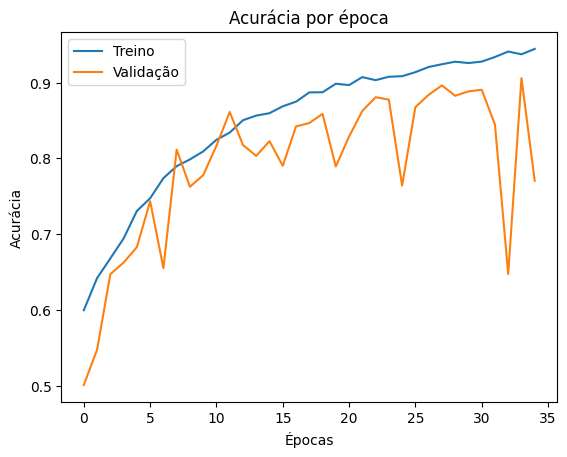

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia por época')
plt.show()

##2.4. Tabela de Experimentos



*   Abaixo temos uma tabela com 30 testes feitos durante o treinamento e validação com a rede neural treinada do zero. Em cada experimento, fomos mudando alguns parâmetros para conseguir uma combinação adequada que utilizaremos futuramente para o teste.




| Nº | Épocas | Otimizador | Learning Rate | Nº Camadas | Neurônios por Camada               | Dropout                        | Acc. Val | Loss Val |
|----|--------|------------|----------------|------------|------------------------------------|--------------------------------|----------|----------|
| 1  | 15     | Adam       | 0.0005         | 5          | Conv2D(32,64,128), Dense(128,1)    | 0.25 (Conv), 0.5 (Dense)       | 0.8176   | 0.3452   |
| 2  | 15     | Adam       | 0.0003         | 5          | Conv2D(32,64,128), Dense(128,1)    | 0.4 (Conv), 0.6 (Dense)        | 0.6270   | 5.5766   |
| 3  | 10     | Adam       | 0.0006         | 8          | Conv2D(64,128,128), Dense(128,1)   | 0.3 (Conv), 0.5 (Dense)        | 0.7531   | 0.4821   
| 4  |15      |   RMSprop         |    0.0006    |  8           |      Conv2D(32,64,128), Dense(128,1)                         |     0.5, 0.4 (Conv), 0.2 (Dense)                    |  0.7291        |   0.4949       |
| 5  |   25     |        Adam    |    0.001    |     8       |       Conv2D(32,64,128), Dense(128,1)                        |   0.5, 0.4 (Conv), 0.2 (Dense)                      |      0.8561    |      0.5940    |
| 6  |   20     |        Adam    |   0.0003     |       8     |      Conv2D(32,64,128), Dense(128,1)                         |    0.6, 0.4 (Conv), 0.3 (Dense)                     |       0.6219   |   20.8719       |
| 7  |    30    |     Adam     |   0.0008     |       8     |            Conv2D(32,64,128), Dense(128,1)                   |          0.5, 0.5 (Conv), 0.5 (Dense)               |    0.8010      |    0.6238      |
| 8  |    30    |     Adam       |     0.0009   |   8|  Conv2D(32,64,128), Dense(128,1)     |        0.4, 0.4 (Conv), 0.1 (Dense)                         |    0.8405                    |     1.3938     |          |
| 9  | 15     | Adam       | 0.0005         | 5          | Conv2D(32,64,128), Dense(128,1)    | 0.25 (Conv), 0.5 (Dense)       | 0.8144   | 0.4503   |
| 10 |  15     | Adam       | 0.0005         | 5          | Conv2D(32,64,128), Dense(128,1)    | 0.25 (Conv), 0.5 (Dense)       | 0.7986   | 0.4530   |
| 11 |    25    |     Adam       |     0.0005   |     8      |       Conv2D(32,64,128), Dense(128,1)                         |           0.25, 0.4 (Conv), 0.5 (Dense)              |     0.7193     |    1.3310      |
| 12 |   35     |       Adam     |    0.0005    |  8          |            Conv2D(64,128,128), Dense(128,1)                    |       0.25, 0.3 (Conv), 0.5(Dense)                 |   0.9254       |      0.2687    |
| 13 |    30    |         Adam    |      0.0006  |     8        |              Conv2D(64,128,128), Dense(128,1)               |             0.25, 0.3 (Conv), 0.1(Dense)              |    0.7128      |       5.6179   |
| 14 |    35    |       Adam     |    0.0005    |     8       |         Conv2D(64,128,128), Dense(128,1)                      |     0.25, 0.4 (Conv), 0.6(Dense)                   |      0.8529    |      0.3208    |
| 15 |    35    |      Adam       |     0.0005    |        8    |        Conv2D(64,128,128), Dense(128,1)                        |     0.5, 0.3 (Conv), 0.6(Dense)                          |      0.7974    |       1.0098   |
| 16 |    15    |      RMSprop      |    0.0005    |      8      |             Conv2D(32,64,128), Dense(128,1)                  |            0.25 (Conv), 0.5 (Dense)            |    0.7082      |     0.9964     |
| 17 |    15    |     RMSprop       |    0.0003    |      8      |               Conv2D(32,64,128), Dense(128,1)                |             0.4 (Conv), 0.6 (Dense)           |     0.7228     |     6.3272     |
| 18 |    10    |      RMSprop      |    0.0006    |      8      |             Conv2D(64,128,128), Dense(128,1)                  |          0.3 (Conv), 0.5 (Dense)              |     0.6749     |     0.5267     |
| 19 |    20    |      RMSprop      |    0.0005    |      8      |              Conv2D(64,64,128), Dense(128,1)                 |            0.4 (Conv), 0.3 (Dense)            |     0.7792     |     0.6021     |
| 20 |   25     |      RMSprop      |    0.001    |     8       |               Conv2D(32,64,128), Dense(128,1)                |            0.5, 0.4 (Conv), 0.2 (Dense)            |     0.6476     |     0.6160     |
| 21 |    20    |      RMSprop      |    0.0003    |      8      |               Conv2D(32,64,128), Dense(128,1)                |             0.6, 0.4 (Conv), 0.3 (Dense)           |     0.4744     |     74.6391     |
| 22 |    30    |      RMSprop      |   0.0008     |      8      |               Conv2D(32,64,128), Dense(128,1)                |            0.5, 0.5 (Conv), 0.5 (Dense)            |     0.6103     |     0.7777     |
| 23 |    30    |      RMSprop     |    0.0009    |      8      |               Conv2D(32,64,128), Dense(128,1)                |           0.4, 0.4 (Conv), 0.1 (Dense)             |     0.6755     |     0.5440     |
| 24 |    15    |      RMSprop      |    0.0005    |      8      |                Conv2D(32,64,128), Dense(128,1)               |            0.25 (Conv), 0.5 (Dense)            |     0.7662      |     1.2336     |
| 25 |    15    |      RMSprop      |    0.0003    |      8      |               Conv2D(32,64,128), Dense(128,1)                |            0.3 (Conv), 0.5 (Dense)            |     0.6251     |     15.1821     |
| 26 |    25    |      RMSprop      |    0.0005    |      8      |               Conv2D(32,64,128), Dense(128,1)                |            0.25, 0.4 (Conv), 0.5 (Dense)            |     0.6736     |     0.4994     |
| 27 |    35    |      RMSprop      |    0.0005    |      8      |              Conv2D(64,128,128), Dense(128,1)                 |             0.25, 0.3 (Conv), 0.5(Dense)           |     0.8089     |     0.8495     |
| 28 |    30    |      RMSprop      |    0.0006    |      8      |                Conv2D(64,128,128), Dense(128,1)               |            0.25, 0.3 (Conv), 0.1(Dense)            |     0.8044     |     0.6502     |
| 29 |    35    |      RMSprop      |    0.0005    |      8      |               Conv2D(64,128,128), Dense(128,1)                |             0.25, 0.4 (Conv), 0.6(Dense)           |     0.7461      |     0.4723     |
| 30 |    35    |      RMSprop      |    0.0005    |      8      |               Conv2D(64,128,128), Dense(128,1)                |            0.5, 0.3 (Conv), 0.6(Dense)            |     0.7240     |     2.5899     |

##2.5. Melhores Combinações



*   Lenvando em consideração a relação entre a acurácia de validação e a função de perda, aqui está a tabela com as  três melhores combinações entre os 30 testes feitos:






| Nº do Teste | Épocas | Otimizador | Learning Rate | Nº Camadas | Neurônios por Camada               | Dropout                        | Acc. Val | Loss Val |
|----|--------|------------|----------------|------------|------------------------------------|--------------------------------|----------|----------|
| 12 |   35     |       Adam     |    0.0005    |  8          |            Conv2D(64,128,128), Dense(128,1)                    |       0.25, 0.3 (Conv), 0.5(Dense)                 |   0.9254       |      0.2687    |
| 14 |    35    |       Adam     |    0.0005    |     8       |         Conv2D(64,128,128), Dense(128,1)                      |     0.25, 0.4 (Conv), 0.6(Dense)                   |      0.8529    |      0.3208    |
| 5  |   25     |        Adam    |    0.001    |     8       |       Conv2D(32,64,128), Dense(128,1)                        |   0.5, 0.4 (Conv), 0.2 (Dense)                      |      0.8561    |      0.5940    |

## 2.6. Teste do Modelo



*   Finalmente, realizamos o teste do modelo, onde avaliamos a função de perda e a acurácia no conjunto de teste. Esses resultados nos ajudam a entender o desempenho do modelo, indicando o nível de aprendizado, e se há sinais de overfitting ou underfitting, entre outros aspectos importantes.



In [20]:
# Prepara o conjunto de teste
datagen_test = ImageDataGenerator(rescale=1./255)
test_gen = datagen_test.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(260, 260),
    batch_size=32,
    class_mode='binary'
)

# Avalia o modelo no conjunto de teste
loss, acc = model.evaluate(test_gen)
print(f"Acurácia final no conjunto de teste: {acc:.4f}")


Found 1645 images belonging to 2 classes.
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.7642 - loss: 1.0452
Acurácia final no conjunto de teste: 0.7647




*   Abaixo temos um gráfico com a relação da acurácia e a função de perda (Loss)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7592 - loss: 1.1078
Acurácia final no conjunto de teste: 0.7647
Loss final no conjunto de teste: 1.1072


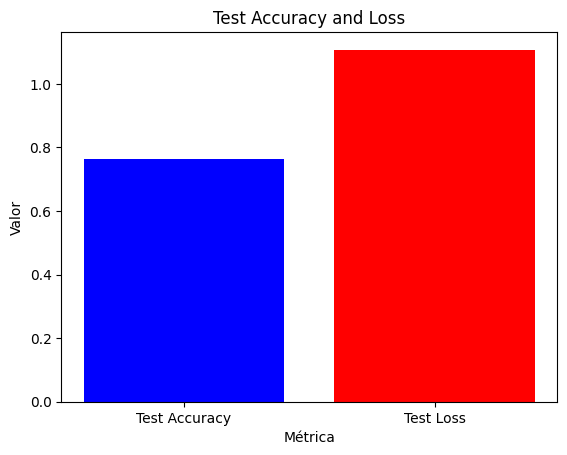

In [21]:
import matplotlib.pyplot as plt

# Avalia o modelo no conjunto de teste
loss, acc = model.evaluate(test_gen)
print(f"Acurácia final no conjunto de teste: {acc:.4f}")
print(f"Loss final no conjunto de teste: {loss:.4f}")

# Plota a acurácia e a perda do teste
fig, ax1 = plt.subplots()

ax1.set_xlabel('Métrica')
ax1.set_ylabel('Valor')
ax1.bar(['Test Accuracy', 'Test Loss'], [acc, loss], color=['blue', 'red'])
ax1.set_title('Test Accuracy and Loss')

plt.show()



##2.7. Conclusão da Rede treinada do zero

* Ao treinar uma rede neural convolucional do zero, foi possível observar o quanto os ajustes nos hiperparâmetros impactam diretamente no desempenho do modelo, como **learning rate**, **dropout**, **otimizadores**, entre outros. A implementação do dropout foi essencial para evitar overfitting, ajudando o modelo a generalizar melhor para novos dados.
* Durante os testes, a combinação de hiperparâmetros que apresentou o melhor resultado no conjunto de validação atingiu uma acurácia de aproximadamente 92,54%. Já no teste final, o modelo com essa mesma configuração alcançou uma acurácia de 93,72% no treino, 87,38% na validação e 87,60% no conjunto de teste, com uma diferença bem equilibrada entre os conjuntos, demonstrando que ele conseguiu generalizar bem, sem sinais relevantes de overfitting.


#3. EfficientNetB2
* Optamos pela EfficientNetB2 para realizar o fine-tuning por ela oferecer um ótimo equilíbrio entre desempenho e eficiência. Essa arquitetura é especialmente adequada para tarefas de classificação de imagens, apresentando alta acurácia mesmo com um número relativamente baixo de parâmetros. Comparada a outras redes mais pesadas, como ResNet ou variantes superiores da própria EfficientNet, a B2 mantém boa precisão com menor custo computacional, o que a torna ideal para cenários com recursos limitados como o nosso e boa capacidade de generalização.


## 3.1. Configuração do modelo EfficientNetB2

No código, utilizamos a EfficientNetB2 pré-treinada no ImageNet como base do nosso modelo, configurada com os seguintes parâmetros:

- **include_top=False:**  
  Removemos a camada final de classificação padrão da EfficientNet para podermos adicionar camadas customizadas ao nosso modelo, adequadas à tarefa específica que queremos resolver (classificação binária).

- **weights="imagenet":**  
  Carregamos os pesos pré-treinados no dataset ImageNet, o que permite aproveitar o aprendizado prévio da rede para extrair características relevantes, acelerando o treinamento e melhorando a capacidade de generalização, especialmente com datasets menores.

- **input_tensor=None** e **input_shape=None:**  
  Mantemos o formato padrão de entrada da EfficientNetB2 (geralmente 260x260x3) para as imagens do nosso dataset, sem customizar o tensor de entrada, simplificando a integração com nosso pipeline.

- **pooling=None:**  
  Não aplicamos nenhum tipo de pooling global na saída da EfficientNet, o que nos permite maior flexibilidade para definir posteriormente como processar as features extraídas (por exemplo, usando GlobalAveragePooling2D em camadas posteriores).

- **classes=1000** e **classifier_activation="softmax":**  
  São parâmetros padrão exigidos pela API do Keras para modelos com topologia completa, mas que neste caso não afetam o modelo porque `include_top=False` indica que a parte classificadora original foi removida.

- **name="efficientnetb2":**  
  Definimos um nome identificador para o modelo base, que pode ser útil para depuração e organização do código.

  Em resumo, essa configuração do EfficientNetB2 define uma base robusta e flexível para o modelo, que extrai recursos visuais relevantes das imagens, deixando para as camadas superiores a responsabilidade de realizar a classificação específica da tarefa.

---


In [22]:
# Criamos o modelo com a efficientNetB2
import keras

model_base = keras.applications.EfficientNetB2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="efficientnetb2",
)

# Vamos chamar o nosso dataset de treino "train_gen" e o nosso dataset de validação "val_gen ao treinar o modelo"


model_base.trainable = True
for layer in model_base.layers[:100]:
    layer.trainable = False

inputs = keras.Input(shape=(260, 260, 3))
x = model_base(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)

# Dense 1
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.4)(x)

# Saída
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

model.summary()
print("Treinando as camadas do topo")
history = model.fit(train_gen, epochs=10, validation_data=val_gen)


31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 260, 260, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb2 (Functional)     │ (None, 8, 8, 1408)     │     7,768,569 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1408)           │         5,632 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       180,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,954,682 (30.34 MB)

 Trainable params: 7,794,149 (29.73 MB)

 Non-trainable params: 160,533 (627.09 KB)

Treinando as camadas do topo
Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 200s 325ms/step - binary_accuracy: 0.6050 - loss: 0.7544 - val_binary_accuracy: 0.6188 - val_loss: 0.6523
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 62s 176ms/step - binary_accuracy: 0.7701 - loss: 0.4518 - val_binary_accuracy: 0.8344 - val_loss: 0.3991
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - binary_accuracy: 0.8405 - loss: 0.3295 - val_binary_accuracy: 0.8631 - val_loss: 0.2997
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - binary_accuracy: 0.8766 - loss: 0.2441 - val_binary_accuracy: 0.8850 - val_loss: 0.2896
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 61s 174ms/step - binary_accuracy: 0.8921 - loss: 0.2081 - val_binary_accuracy: 0.9038 - val_loss: 0.3008
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 61s 174ms/step - binary_accuracy: 0.9015 - loss: 0.1906 - val_binary_accuracy: 0.9153 - val_loss: 0.2803
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - binary_accuracy: 0.9196 - loss: 0.1641 - va

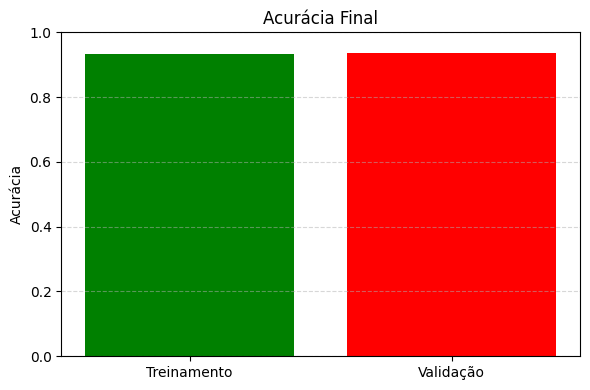

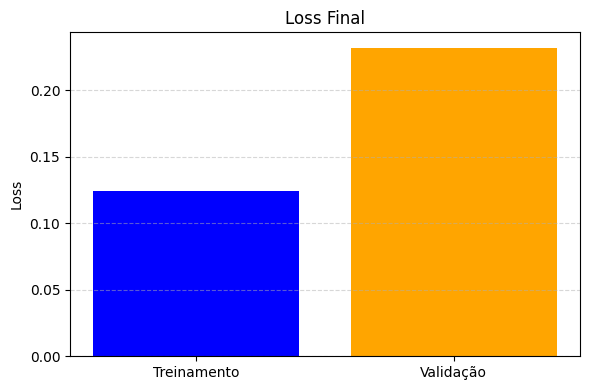

In [23]:
import matplotlib.pyplot as plt

# Últimos valores
final_train_acc = history.history['binary_accuracy'][-1]
final_val_acc = history.history['val_binary_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Gráfico de Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Validação'], [final_train_acc, final_val_acc], color=['green', 'red'])
plt.ylabel('Acurácia')
plt.title('Acurácia Final')
plt.ylim(0, 1)  # como a acurácia vai de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico de Loss
plt.figure(figsize=(6, 4))
plt.bar(['Treinamento', 'Validação'], [final_train_loss, final_val_loss], color=['blue', 'orange'])
plt.ylabel('Loss')
plt.title('Loss Final')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Found 1645 images belonging to 2 classes.
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - binary_accuracy: 0.9613 - loss: 0.1317
Acurácia final no conjunto de teste: 0.9386
Loss final no conjunto de teste: 0.1658


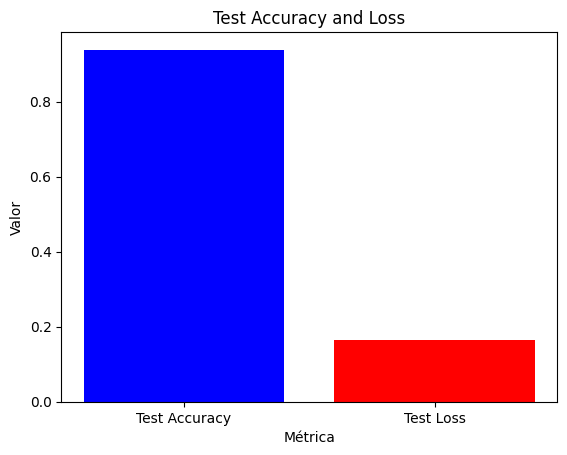

In [24]:
# Iremos criar o test
test_gen = datagen_train.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(260, 260),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


# Avalia o modelo no conjunto de teste
loss, acc = model.evaluate(test_gen)
print(f"Acurácia final no conjunto de teste: {acc:.4f}")
print(f"Loss final no conjunto de teste: {loss:.4f}")

# Plota a acurácia e a perda do teste
fig, ax1 = plt.subplots()

ax1.set_xlabel('Métrica')
ax1.set_ylabel('Valor')
ax1.bar(['Test Accuracy', 'Test Loss'], [acc, loss], color=['blue', 'red'])
ax1.set_title('Test Accuracy and Loss')

plt.show()

## 3.2 Transfer Learning

- Realizamos duas formas de transfer learning em nosso treinamento

 ## 1. Congelamento Total com Camada de Classificação Simples
- **Estratégia**:  
  - Todas as camadas da EfficientNetB2 permanecem congeladas  
  - Utiliza apenas os pesos pré-treinados na ImageNet sem ajustes  
- **Adaptação**:  
  - Adição de uma única camada densa para classificação binária  
  - Foco na extração de features genéricas sem fine-tuning  
- **Vantagem**:  
  - Treinamento rápido e estável  
  - Baixo risco de overfitting  

## 2. Congelamento Parcial com Fine-Tuning  
- **Estratégia**:  
  - Descongelamento seletivo das camadas mais profundas da rede  
  - Combinação de pesos pré-treinados e ajuste específico  
- **Adaptação**:  
  - Ajuste progressivo das camadas especializadas  
  - Adição de blocos densos intermediários com regularização  
- **Vantagem**:  
  - Maior capacidade de adaptação ao domínio-alvo  
  - Balanceamento entre conhecimento prévio e especialização  

**Insight Principal**:  
A segunda abordagem demonstrou superioridade ao permitir que a rede adaptasse suas representações hierárquicas, mantendo a estabilidade das features básicas aprendidas previamente.

##3.3. Tabela de Experimentos


| Nº  | Épocas   | Otimizador | Learning Rate                  | Nº Camadas                          | Neurônios por Camada                     | Dropout                      | Acc. Val | Loss Val | OBS                                                                                 |
|---- |--------- |----------- |--------------------------------|------------------------------------- |----------------------------------------- |----------------------------- |--------- |--------- |------------------------------------------------------------------------------------ |
| 1   | 4 (2+2)  | Adam       | Fase1: 0.001 / Fase2: 0.00001  | Modelo Base + Dense(1)              | Dense(1)                                | 0.3                         | 0.5314   | 0.6980   |                                                                                    |
| 2   | 14 (8+6) | RMSprop    | Fase1: 0.0005 / Fase2: 0.000005| Modelo Base + Dense(1)              | Dense(1)                                | 0.2                         | 0.5756   | 0.8309   |                                                                                    |
| 3   | 19 (9+10)| Adam       | Fase1: 0.0003 / Fase2: 0.00001 | Modelo Base + Dense(1)              | Dense(1)                                | 0.4                         | 0.5708   | 0.6930   |                                                                                    |
| 4   | 12       | Adam       | 1e-6                           | Modelo Base                         | Dense(1)                                | 0                           | 0.5744   | 0.6982   |                                                                                    |
| 5   | 12       | Adam       | 1e-6                           | Modelo Base + 6                     | Dense(128), Dense(64), Dense(1)         | 0.3, 0.2                   | 0.5635   | 0.6999   |                                                                                    |
| 6   | 12       | Adam       | 0.00006                        | Modelo Base + 6                     | Dense(256), Dense(128), Dense(1)        | 0.4, 0.3                   | 0.5763   | 1152.1722|                                                                                    |
| 7   | 15       | Adam       | 1e-6                           | Modelo Base + 6 camadas             | Conv2D(32,3x3), Conv2D(3,1x1), Dense(64,32,1) | 0.5 (Dense), 0.2 (Dense) | 0.5784   | 0.6899   |                                                                                    |
| 8   | 15       | Adam       | 1e-6                           | Modelo Base + Conv2D(32, 3) + Dense(64, 32) | Dense(64, 32)                      | 0.5 (Dense 64) / 0.2 (Dense 32) | 0.5375   | 0.7192   | EarlyStopping (patience=5)                                                         |
| 9   | 15       | RMSprop    | 1e-6                           | Modelo Base + Conv2D(32, 3) + Dense(64, 32) | Dense(64, 32)                      | 0.5 (Dense 64) / 0.2 (Dense 32) | 0.5835   | 0.6759   |                                                                                    |
| 10  | 20       | RMSprop    | 5e-7                           | Modelo Base + Conv2D(32,3) + Dense(124,64,32,1) | 124 (sigmoid), 64, 32, 1         | 0.5 (Dense 124), 0.5 (64), 0.2 (32) | 0.5399   | 0.6903   |                                                                                    |
| 11  | 20       | RMSprop    | 1e-6                           | Modelo Base + 4 (Dense)             | Dense(256, 128, 64, 32) ReLU, Sigmoid, ReLU | 0.2, 0.5, 0.5, 0.2      | 0.5033   | 0.7218   |                                                                                    |
| 12  | 20       | Adam       | 5e-7                           | Modelo Base + 3 Dense               | Dense(128, 64, 32) ReLU                 | 0.5, 0.5, 0.2               | 0.4656   | 0.7729   | EarlyStopping (patience=5), ReduceLROnPlateau (patience=2)                        |
| 13  | 20       | Adam       | 5e-7                           | Modelo Base + 2 Conv2D + 3 Dense    | Conv2D(32,3x3), Conv2D(3,1x1), Dense(128,64,32,1) | 0.5, 0.5, 0.2        | 0.4884   | 0.7214   | EarlyStopping(patience=5), ReduceLROnPlateau                                        |
| 14  | 10       | Adam       | 1e-4                           | Modelo Base (EfficientNetB2) com 150 camadas congeladas + Dense(256,1) | Dense(256 ReLU), Dense(1) | 0.3      | 0.9034   | 0.2142   | Fine-tuning parcial, sem Rescaling, from_logits=True                               |
| 15  | 5        | Adam       | 1e-4                           | EfficientNetB2 (camadas 51–fim treináveis) + Dense(128, 1) | Dense(128, 1)           | 0.3                         | 0.9496   | 0.1412   | 5 épocas só com fine-tuning parcial (camadas iniciais congeladas)                 |
| 16  | 5        | Adam       | 5e-7                           | EfficientNetB2 (camadas 51–fim treináveis) + Dense(64, 1) | Dense(64, 1)             | 0.2                         | 0.5553   | 0.7528   | Fine-tuning com 50 camadas congeladas e LR baixo                                   |
| 17  | 8        | RMSprop    | 1e-4                           | Modelo Base + 3 Dense               | Dense(128, 64, 32, 1)                   | 0.3, 0.3, 0.2               | 0.9603   | 0.1023   | 50 camadas congeladas; BatchNorm após cada Dense; from_logits=True               |
| 18  | 5        | RMSprop    | 1e-4                           | Modelo Base + 3 Dense               | Dense(128, 64, 32, 1)                   | 0.3, 0.3, 0.2               | 0.5362   | 0.6326   | 200 camadas congeladas; BatchNorm após cada Dense; from_logits=True              |
| 19  | 5        | RMSprop    | 5e-5                           | Modelo Base + 3 Dense               | Dense(128, 64, 32, 1)                   | 0.3, 0.3, 0.2               | 0.8274   | 0.4151   | 100 camadas congeladas, BatchNorm após cada Dense, from_logits=True             |
| 20  | 10       | Adam       | 2e-4                           | Modelo Base + 2 Dense               | Dense(128, 1)                           | 0.4                         | 0.9300   | 0.2143   | 100 camadas congeladas; BatchNorm + Dropout só antes do Dense(128); from_logits=True |


##3.4. Melhores Combinações

| Nº  | Épocas | Otimizador | Learning Rate | Nº Camadas                            | Neurônios por Camada     | Dropout                     | Acc. Val | Loss Val | OBS                                                                 |
|-----|--------|------------|----------------|----------------------------------------|---------------------------|-----------------------------|----------|----------|----------------------------------------------------------------------|
| 17  | 8      | RMSprop    | 1e-4           | Modelo Base + 3 Dense                  | Dense(128, 64, 32, 1)     | 0.3, 0.3, 0.2               | **0.9603** | 0.1023   | 50 camadas congeladas; BatchNorm após cada Dense; from_logits=True |
| 15  | 5      | Adam       | 1e-4           | EfficientNetB2 (camadas 51–fim treináveis) + Dense(128, 1) | Dense(128, 1) | 0.3                         | **0.9496** | 0.1412   | Fine-tuning parcial (camadas iniciais congeladas)                   |
| 20  | 10     | Adam       | 2e-4           | Modelo Base + 2 Dense                  | Dense(128, 1)             | 0.4                         | **0.9300** | 0.2143   | 100 camadas congeladas; BatchNorm + Dropout antes do Dense(128)     |


Os testes de perda e acurácia

##3.5. Conclusão da EfficientNetB2

Durante os experimentos com a EfficientNetB2, consideramos essencial explorar diferentes combinações de hiperparâmetros, como a taxa de aprendizado, número de épocas, número de camadas treináveis e o uso de regularização, a fim de encontrar os melhores resultados para o nosso problema.

Essa busca não foi simples — enfrentamos dificuldades em equilibrar a complexidade do modelo com a prevenção de overfitting. Para lidar com isso, adotamos duas estratégias principais: ajuste fino (fine-tuning) de parte das camadas convolucionais e congelamento parcial e depois o treinamento.

Os testes realizados com essas estratégias trouxeram resultados acima do esperado, atingindo acurácias entre **90% e 95%** nos melhores modelos. Ressaltamos que técnicas como o uso da função de ativação **ReLU** e a aplicação de **Dropout** foram fundamentais para melhorar a generalização e mitigar o overfitting observado nas primeiras iterações.O otimizador RMSprop teve os melhores resultados para a EfficientNetB2


#4. Considerações finais


Ao longo deste trabalho, foi possível observar o impacto direto das escolhas arquiteturais e dos hiperparâmetros no desempenho dos modelos de redes neurais convolucionais. Tanto no treinamento de uma CNN do zero quanto na aplicação de transfer learning com a EfficientNetB2, ajustes como taxa de aprendizado, número de camadas treináveis, otimizadores e o uso de técnicas de regularização, como Dropout e funções de ativação ReLU, mostraram-se fundamentais para evitar overfitting e melhorar a capacidade de generalização dos modelos.

Apesar dos desafios enfrentados na busca por uma configuração ideal, os resultados obtidos foram bastante satisfatórios. A CNN treinada do zero alcançou uma acurácia final de 87,60% no conjunto de teste, enquanto os melhores modelos baseados na EfficientNetB2 superaram a marca dos 90%, chegando até 95% de acurácia em validação, demonstrando o poder do fine-tuning e da transferência de aprendizado.

Esses experimentos reforçam a importância de explorar e ajustar cuidadosamente os parâmetros durante o desenvolvimento de modelos de deep learning, além de evidenciar o potencial das arquiteturas modernas pré-treinadas como ponto de partida para tarefas específicas.


##Referências



*   https://www.kaggle.com/datasets/orvile/simple-vs-comminuted-fractures-x-ray-data
*   https://medium.com/@rohanmistry231/data-splitting-train-test-validation-in-machine-learning-2d5d1927fa69
* https://keras.io/api/applications/efficientnet/#efficientnetb2-function


